<a href="https://colab.research.google.com/github/knightligh/AI/blob/main/3_VietNamese_Dishes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Liên kết Google Drive để lấy dữ liệu 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1.Khai báo Thư viện sử dụng 

In [2]:
from os import listdir
from numpy import asarray
from numpy import save
from keras import preprocessing
from tensorflow.keras.utils import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Dense
from numpy.ma.core import reshape


In [3]:
data="/content/drive/MyDrive/Food_Data/"

In [5]:
x,y=list(),list()

for folder in listdir(data):
    if folder!='.DS_Store':
        print("Folder=",folder)
        for file in listdir(data  + folder):
            if file!='.DS_Store':
                #print("File=", file)
                pixel=load_img(data  + folder +"/" + file,target_size=(150,150))
                pixel=img_to_array(pixel)
                x.append(pixel)
                y.append( folder)

x =asarray(x)
y =asarray(y)

Folder= Bún bò huế
Folder= Bánh xèo
Folder= Chả giò
Folder= Xôi
Folder= Phở
Folder= Bún thịt nướng
Folder= Bánh ướt
Folder= Cơm tấm
Folder= Mì quảng
Folder= Bánh Mì


# 3.Tạo one_hot_encoding

In [6]:
from sklearn.preprocessing import LabelBinarizer
import pickle
from sklearn.model_selection import train_test_split
encoder = LabelBinarizer()
y = encoder.fit_transform(y)
#print(y)

file = open('pix.data', 'wb')
# dump information to that file
pickle.dump((x,y), file)
# close the file
file.close()

In [7]:
def load_data():
    file = open('pix.data', 'rb')
    # dump information to that file
    (x, y) = pickle.load(file)
    # close the file
    file.close()
    return x, y

#save_data()
X,y = load_data()
#random.shuffle(X)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=100)

#chuyển đổi dữ liệu tránh overload
#X_train = X_train.reshape(328,144,192,3)
#X_test= X_test.reshape(82,144,192,3)
X_train= X_train.astype('float32')/255
print(y_train.shape)
X_test= X_test.astype('float32')/255
print(X_train.shape)
print(X_test.shape)

(505, 10)
(505, 150, 150, 3)
(127, 150, 150, 3)


# 4.Tạo Model & Train Model

In [8]:
from keras import models 
from keras.models import Sequential,Model
from keras import Input
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization
from keras.optimizers import Adam
batch_size=100 #lô
epochs=   20  #số lần học
classes=10   #phân loại

#tao model
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(150,150,3),padding='same'))
from keras.layers import LeakyReLU
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

#so lan tich chap
model.add(Conv2D(64,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(128,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

from keras import optimizers
from keras import losses
model.add(Flatten())
model.add(Dense(1000,activation='linear'))
model.add(Dense(500,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(classes,activation='softmax'))
model.compile(loss=losses.categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
model.summary()
train=model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 64)       0         
 2D)                                                    

# 5.Lưu Model đã train

In [9]:
model.save("/content/drive/MyDrive/Colab Notebooks/Recongnize_VietNamese_Food.h5")

# 6.Tải Model đã train và dự đoán 

1/1 [==============================] - 0s 230ms/step
This is:  Cơm tấm [1.5877931e-01 2.8636903e-01 7.0113245e-05 4.1387932e-05 2.0671925e-03
 3.4400087e-02 4.3008497e-01 5.4982275e-02 1.1184540e-06 3.3204507e-02]
reliability: 43.00849735736847 %


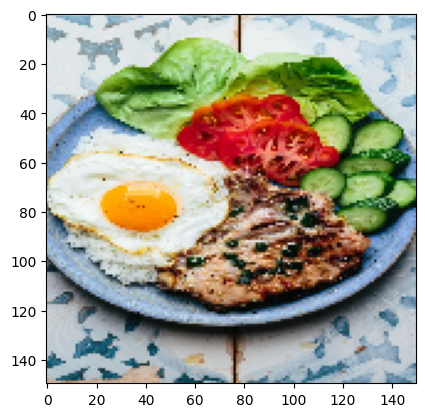

In [10]:
from keras.saving.saving_lib import load_model
import matplotlib.pyplot as plt
from keras.models import load_model
model100=load_model("/content/drive/MyDrive/Colab Notebooks/Recongnize_VietNamese_Food.h5")

import numpy as np
class_name=['Bánh Mì','Bánh ướt','Bánh xèo','Bún bò huế','Bún thịt nướng','Chả giò','Cơm tấm','Mì quảng','Phở','Xôi']

img = load_img('/content/drive/MyDrive/Food_Data/Cơm tấm/comtam_1.jpg',target_size=(150,150))
plt.imshow(img)

img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255

predict = model100.predict(img)

print("This is: ", class_name[np.argmax(predict[0])],(predict[0]))

a=np.max(predict[0])
a=a*100
print("reliability:",a,'%')